# Supervised Learning with Python: Regression Analysis

I'll be investigating _Gapminder_ dataset in this Notebook.

Outline: 
* Exploring the Data
* Regression Analysis with _sklearn_
* Cross Validation
* Regression with Categorical Features

In [23]:
# Import necessary modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Exploring the Data

The dataset is seperated into two parts.
1. Independent variables (or features)
2. Response variable (or target) : "life" column of the dataset

In [24]:
# Read the gapminder file into df
df = pd.read_csv("datasets/gapminder.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [25]:
# Print the shape of the DataFrame
df.shape

(139, 10)

Gapminder dataset consists of 9 features or independent variables. The target or the response variable is **life expectancy** (life).

In [26]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [27]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


`df.corr()` gives us the pairwise correlation between variables.

In [28]:
# Pairwise correlation
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


Text(0.5, 1.0, 'Pairwise Correlation Between Variables')

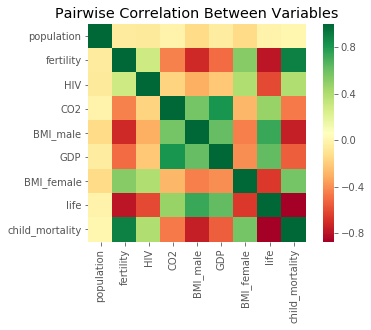

In [52]:
# import seaborn as sns

# Plot the pairwise correlation between variables with colormap 'Red Yellow Green'b
sns.heatmap(df.corr(), square=True, cmap='RdYlGn').set_title('Pairwise Correlation Between Variables')

`fertility` and `life` are negatively correlated. We'll investigate these variables in more deteail in the following section.

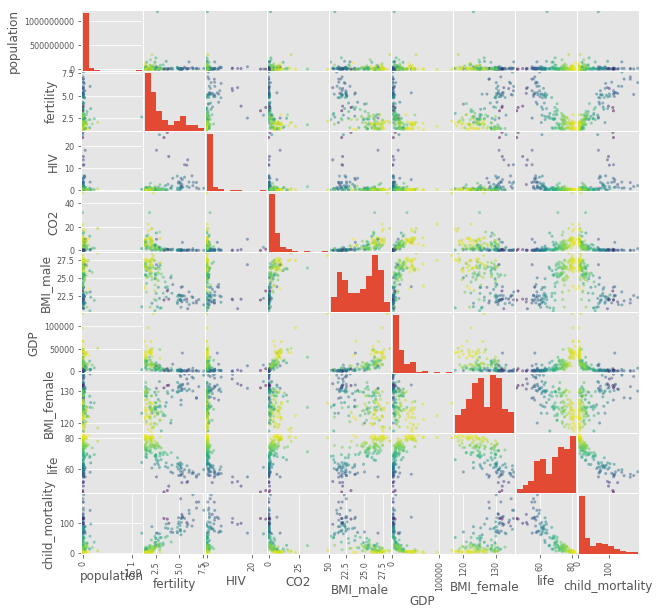

In [61]:
# Choose graph style
plt.style.use('ggplot')

# Scatter matrix
pd.plotting.scatter_matrix(df, c = df['life'], figsize=(10,10))

# Show the plot
plt.show()

## Regression Analysis with _sklearn_

In [30]:
#from sklearn.linear_model import LinearRegression

_Note_: scikit-learn does not accept categorical variables. Therefore, 'Region' column is not initially included in the features. However, this factor also  contains useful information that can be used in the model. Dealing with categorical variable 'Region' is explained [here](#Regression-with-Categorical-Features), in another section of this Notebook.

In [62]:
# Create the feature array
X = df.drop(['life', 'Region'], axis = 1).values # features (columns other than 'life')

# Create the target array
y = df['life'].values # target

In [63]:
# Print the type of X and y
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [64]:
# Print hte shape of X and y
X.shape, y.shape

((139, 8), (139,))

Let's fit a basic **linear regression** and predict _life expectancy_ with only one feature: _fertility_. 

In [65]:
# Create the array X_fertility
X_fertility = X[:, 1]

# Compare the shapes of X_fertility and y
X_fertility.shape, y.shape

((139,), (139,))

We'll now reshape the data. Note that "-1" means we want numpy to figure out the dimension.

In [66]:
# Reshape the array y
y = y.reshape(-1, 1)

# Reshape the array X_fertility
X_fertility = X_fertility.reshape(-1, 1)

# Print the shape of the X_fertility
X_fertility.shape

(139, 1)

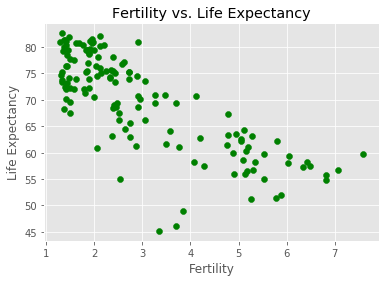

In [69]:
# Scatter plot
plt.scatter(X_fertility, y, color = 'green')

# Title an labels
plt.title('Fertility vs. Life Expectancy')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

# Show the plot
plt.show()

In [70]:
# Create the regressor
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model
reg.fit(X_fertility, y)

# Compute predictions over the prediction space
y_pred = reg.predict(prediction_space)

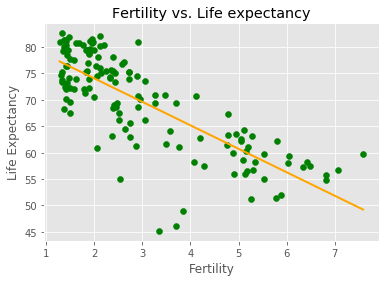

In [73]:
# Scatter plot
plt.scatter(X_fertility, y, color='green')

# Plot Regression line
plt.plot(prediction_space, y_pred, color='orange', linewidth=2)

# Title and labels
plt.title('Fertility vs. Life expectancy')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

# Show the plot
plt.show()

*R-squared* shows us how much of the variation can be explained by our model.  `.score()` method returns the coefficient of determination R^2 of the prediction.

In [74]:
print(reg.score(X_fertility, y))

0.6192442167740035


In [75]:
print('Coefficients: \n', reg.coef_, '\nIntercept: \n', reg.intercept_ )

Coefficients: 
 [[-4.44387899]] 
Intercept: 
 [82.95721362]


Our basic model with only one feature:
$$y = x(-4.44387899) + 82.95721362$$

We'll now print out the whole statistics.

In [76]:
# import statsmodels.api as sm

# Create the feature and the target
X_fertility_sm = df['fertility']
y_sm = df['life']

# Add an intercept (beta_0) to the model
X_fertility_sm = sm.add_constant(X_fertility_sm)

model = sm.OLS(y, X_fertility_sm).fit() # sm.OLS(target, feature)
predictions = model.predict(X_fertility_sm)

# Print out the statistics
model.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     222.8
Date:                Sat, 13 Apr 2019   Prob (F-statistic):           1.62e-30
Time:                        20:40:13   Log-Likelihood:                -436.91
No. Observations:                 139   AIC:                             877.8
Df Residuals:                     137   BIC:                             883.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.9572      1.015     81.740      0.000      80.950      84.964
fertility     -4.4439      0.298    -14.927      0.000      -5.033      -3.855
==============================================================================
Omnibus:                       38.234   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.501
Skew:                          -1.242   Prob(JB):                     2.98e-16
Kurtosis:                       5.485   Cond. No.                         7.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, let's fit a model over all features. First we'll split the dataset into _training_ and _testing_ sets.

In [46]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [77]:
# Create the regressor
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data
y_pred = reg_all.predict(X_test)

# Print the R-squared
print("R^2: {0:.2f}".format(reg_all.score(X_test, y_test)))

R^2: 0.84


Root Mean Squared Error (RMSE) is another metric to assess regression models.

In [48]:
# from sklearn.metrics import mean_squared_error

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error: {0:.2f}".format(rmse))

Root Mean Squared Error: 3.25


In [23]:
# Print hte coefficients and the intercept
print('Coefficients: \n', reg_all.coef_, '\nIntercept: \n', reg_all.intercept_ )

Coefficients: 
 [[-2.03205166e-09 -3.30810286e-01 -7.21234146e-01 -1.47522293e-01
   4.93199538e-01  1.37767248e-04 -2.52417353e-01 -8.67212952e-02]] 
Intercept: 
 [94.0377883]


## Cross-validation

With all features used, R^2 has improved significantly. However, it is also important to perform **cross-validation** on the data. This technique is used for evaluating how the results of our  analysis will generalize to an independent data set. "In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data."

In [78]:
#from sklearn.model_selection import cross_val_score

# Create the regressor
reg_cv = LinearRegression()

# 5-fold cross-validation score
cv_scores = cross_val_score(reg_cv, X, y, cv=5)

print(cv_scores)

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


In [79]:
print("Average 5-Fold CV Score: {0:.2f}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.86


Now that we have cross-validated the model, we can trust more on our predictions.

> Cross validation iterators can also be used to directly perform model selection using Grid Search for the optimal hyperparameters of the model. [Source](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection)

## Regression with Categorical Features

Boxplot below shows that 'region' appears to be an important factor. Therefore, we should retain this column.

Text(0, 0.5, 'Life Expectancy')

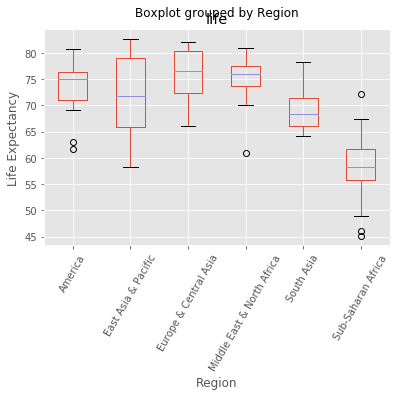

In [80]:
# Create boxplot of "life expectancy" per "region"
df.boxplot('life','Region', rot=60)
plt.xlabel('Region')
plt.ylabel('Life Expectancy')

Binarizing the categorical variable by creating dummy variables is one way of handling categorical features.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [87]:
# Create dummy variables
df_region = pd.get_dummies(df)

print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')


In [88]:
# Create dummy variables with dropping the first
df_region = pd.get_dummies(df, drop_first=True)

print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [89]:
# Create features (columns other than 'life')
X = df_region.drop(['life'], axis = 1).values

# Create target
y = df_region['life'].values

Now, we can build regression models as we did before.

In [90]:
# from sklearn.model_selection import cross_val_score

# Instantiate the regressor
reg_cv2 = LinearRegression()

# Perform 5-fold cross-validation
cv2_scores = cross_val_score(reg_cv2, X, y, cv=5)

# Print the cross-validated scores
print(cv2_scores)

[0.8196741  0.80301541 0.89758712 0.80425614 0.94015848]


In [91]:
print("Average 5-Fold CV Score: {0:.2f}".format(np.mean(cv2_scores)))

Average 5-Fold CV Score: 0.85
